# Forecasting
Background: This data is from a car dealer ship. This is business that buys cars from a manufacturer and then resells them for money. 
Question:   What is the right number of cars to order compared to the resell?

In [28]:
import pandas as pd
#importing the data from a csv into pandas dataframe
carsales = pd.read_csv('carsales.csv')

I want to look at the csv file and the length and to make sure that it made it into the data frame.

In [29]:
carsales.head()
carsales

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0
...,...,...
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


We have 109 rows and 2 columns with one being the month and the other column is the monthly car sales in Quebec in 1960 to 1968.

In [30]:
#lets change the columns name to make if easier to see and understand
carsales.columns = ['month', 'sales']

In [31]:
carsales

,month,sales
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0
...,...,...
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


In [32]:
#I need to get rid of the that last row
carsales = carsales.loc[0:107,:].copy()

In [33]:
#to double check that the 108 row has been removed
carsales

,month,sales
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0
...,...,...
103,1968-08,16722.0
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0


## Data Cleaning

In [34]:
#to deal with dates at a numerical number so 1960 is 0 and on
carsales['period']=list(range(108))

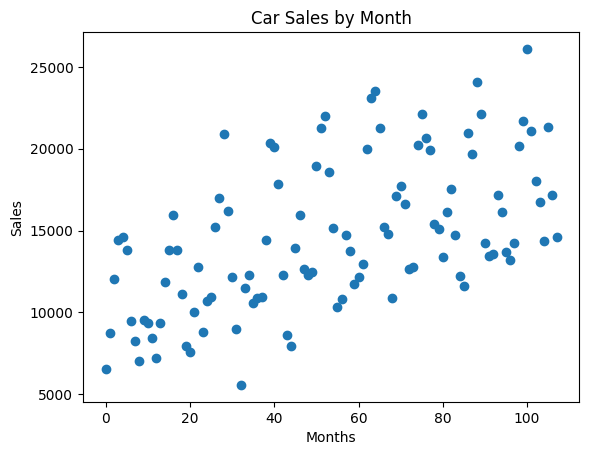

In [36]:
from matplotlib import pyplot as plt

#visualizing the the data to see if there is a trend
plt.scatter(carsales['period'],carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [38]:
#set our x and y variables
x =carsales['period'].values.reshape(-1,1)
y =carsales['sales'].values.reshape(-1,1)

# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [40]:
print(regressor.coef_)
print(regressor.intercept_)

[[81.20250174]]
[10250.77726809]


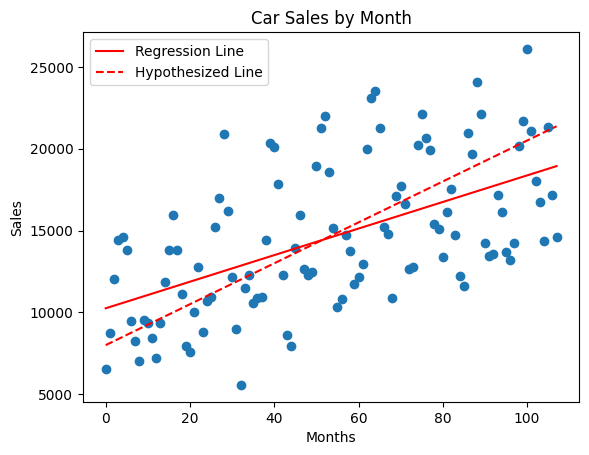

In [42]:
#plot the same graph and wiht the regression line
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(carsales['period'],[81.2 * i + 10250.8 for i in \
                             carsales['period']],'r-',label='Regression Line')
plt.plot(carsales['period'],[125 * i + 8000 for i in \
                             carsales['period']],'r--',label='Hypothesized Line')
plt.legend(loc='upper left')
plt.title('Car Sales by Month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

## Calculating error using mae and rmse

In [51]:
#functions to find the mae and rmse
import numpy as np
def get_mae(line,actual):
    error = [(x-y) for x,y in zip(line,actual)]
    errorabs = [abs(value) for value in error]
    mae = np.mean(errorabs)
    return(mae)

def get_rmse(line,actual):
    error = [(x-y) for x,y in zip(line,actual)]
    errorsqr = [value**2 for value in error]
    rmse = np.sqrt(np.mean(errorsqr))
    return(rmse)

In [52]:
saleslist = carsales['sales'].tolist()
regressionline = [81.2 * i + 10250.8 for i in carsales['period']]
hypthesizedline = [125 * i + 8000 for i in carsales['period']]

In [53]:
print(get_mae(regressionline,saleslist))
print(get_mae(hypthesizedline,saleslist))
print(get_rmse(regressionline,saleslist))
print(get_rmse(hypthesizedline,saleslist))

3154.3592592592595
3239.777777777778
3725.491219512759
3968.900519455399
